In [1]:
%pylab inline
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

Populating the interactive namespace from numpy and matplotlib


In [2]:
X,y = make_moons(n_samples=10000, noise = 0.4)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

Text(0, 0.5, '$x_2$')

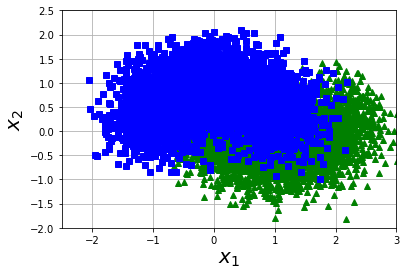

In [3]:
plt.plot(X_train[:,0][y_train==1],X_train[:,1][y_train==1],"g^")
plt.plot(X_train[:,0][y_train==0],X_train[:,1][y_train==0],"bs")
plt.axis([-2.5,3,-2,2.5])
plt.grid()
plt.xlabel(r"$x_1$",fontsize=20)
plt.ylabel(r"$x_2$",fontsize=20)

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [50]:
param_grid={'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}
tree_clf = DecisionTreeClassifier(random_state=42)

In [51]:
grid_search = GridSearchCV(tree_clf,param_grid,cv=3,n_jobs=-1,verbose=1)

grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 294 candidates, totalling 882 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done 882 out of 882 | elapsed:    4.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 

In [52]:
final_model = grid_search.best_estimator_

In [54]:
final_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=17,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

from sklearn.metrics import accuracy_score, precision_score, recall_score

In [58]:
y_pred = final_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.85

In [60]:
from sklearn.model_selection import cross_val_predict

In [61]:
y_train_pred = cross_val_predict(final_model,X_train,y_train, cv=3)

In [62]:
precision_score(y_train,y_train_pred)

0.8730681530276159

In [63]:
recall_score(y_train,y_train_pred)

0.8514949345193971

In [64]:
from sklearn.model_selection import ShuffleSplit
import scipy as sc

In [67]:
n_trees =1000
instances = 100
rs = ShuffleSplit(n_splits = n_trees,test_size=len(X_train) - instances, random_state=42)
mini_sets = []
for min_train_index, min_test_index in rs.split(X_train):
    X_train_min = X_train[min_train_index]
    y_train_min = y_train[min_train_index]
    mini_sets.append((X_train_min, y_train_min))

In [68]:
from sklearn.base import clone

forest = [clone(final_model) for _ in range(n_trees)]

In [70]:
accu_scores = []
for tree, (X_min_train, y_min_train) in zip(forest, mini_sets):
    tree.fit(X_min_train,y_min_train)
    y_pred = tree.predict(X_test)
    accu_scores.append(accuracy_score(y_test, y_pred))
    
np.mean(accu_scores)

0.7976645

In [71]:
Y_pred = np.empty([n_trees, len(X_test)], dtype=np.uint8)

for tree_index, tree in enumerate(forest):
    Y_pred[tree_index] = tree.predict(X_test)
    
y_pred_majority_votes, n_votes=sc.stats.mode(Y_pred,axis=0) #axis=0 goes column first, axis=1 goes rows

In [76]:
accuracy_score(y_test,y_pred_majority_votes.reshape([-1]))

0.859

In [87]:
a = np.array([[6, 8, 3, 0],
               [3, 2, 1, 7],
               [8, 1, 8, 4],
               [5, 3, 0, 5],
               [4, 7, 5, 9]])
votes,n_votes=sc.stats.mode(a,axis=1)

In [88]:
n_votes

array([[1],
       [1],
       [2],
       [2],
       [1]])

In [89]:
votes

array([[0],
       [1],
       [8],
       [5],
       [4]])